Taken from fastai NLP "8-translation-transformer"

FastText embeddings: https://fasttext.cc/docs/en/crawl-vectors.html

In [35]:
from fastai2.text.all import *
from fastai2.callback.all import *
from fastai2.basics import *
import seaborn as sns

from einops import rearrange
import gc

In [36]:
path = Path('data/irish/crosslang')
path.ls(), path

((#4) [Path('data/irish/crosslang/en-ga-crosslang.zip'),Path('data/irish/crosslang/paracrawl_cleaned_en-ga.csv'),Path('data/irish/crosslang/paracrawl.ga'),Path('data/irish/crosslang/paracrawl.en')],
 Path('data/irish/crosslang'))

In [37]:
# ga = pd.read_csv(path/'paracrawl.ga', error_bad_lines=False, sep='\n\n', header=None, engine='python')
# en = pd.read_csv(path/'paracrawl.en', error_bad_lines=False, sep='\n\n', header=None, engine='python')
# len(ga), len(en)

In [38]:
#ga.iloc[7569,:], en.iloc[7569,:]

In [39]:
# para=pd.concat([ga, en], axis=1)
# para.columns=['ga','en']
# para.head()

In [40]:
# def remove_non_ascii(text):
#     return ''.join(i for i in text if ord(i)<128)

# p2 = pd.DataFrame()
# p2['ga'] = para['ga'].apply(remove_non_ascii)
# p2['en'] = para['en'].apply(remove_non_ascii)
# len(p2)

In [41]:
#p2.sample(20)

In [42]:
# print(len(p2))
# p2 = p2[p2.ga.str.len() > 30].copy()
# print(len(p2))

In [43]:
# # Remove porn
# print(len(p2))
# p2 = p2[~p2.en.str.contains('porn')].copy()
# p2 = p2[~p2.en.str.contains('Porn')].copy()
# p2 = p2[~p2.en.str.contains('HD Video')].copy()
# p2 = p2[~p2.en.str.contains(' sex video')].copy()
# p2 = p2[~p2.en.str.contains(' Orgy ')].copy()
# p2 = p2[~p2.en.str.contains(' Squirting ')].copy()
# p2 = p2[~p2.en.str.contains(' sex Party ')].copy()
# p2 = p2[~p2.en.str.contains(' car sex ')].copy()
# p2 = p2[~p2.en.str.contains(' Threesome ')].copy()
# p2 = p2[~p2.en.str.contains(' threesome ')].copy()
# p2 = p2[~p2.en.str.contains(' fucking ')].copy()
# p2 = p2[~p2.en.str.contains(' cock sucking ')].copy()
# p2 = p2[~p2.en.str.contains(' has sex ')].copy()
# p2 = p2[~p2.en.str.contains(' sucking ')].copy()
# p2 = p2[~p2.en.str.contains(' sex with ')].copy()
# p2 = p2[~p2.en.str.contains(' sex toy')].copy()
# p2 = p2[~p2.en.str.contains(' public sex')].copy()
# p2 = p2[~p2.en.str.contains(' teen sex ')].copy()
# p2 = p2[~p2.en.str.contains(' oral sex ')].copy()
# p2 = p2[~p2.en.str.contains(' Oral sex ')].copy()
# p2 = p2[~p2.en.str.contains(' loves sex ')].copy()
# p2 = p2[~p2.en.str.contains(' anal sex ')].copy()
# p2 = p2[~p2.en.str.contains(' hard sex ')].copy()
# p2 = p2[~p2.en.str.contains(' live sex ')].copy()
# p2 = p2[~p2.en.str.contains(' big ass ')].copy()
# p2 = p2[~p2.en.str.contains(' sex games ')].copy()
# p2 = p2[~p2.en.str.contains(' sex partner ')].copy()
# p2 = p2[~p2.en.str.contains(' video sex ')].copy()
# p2 = p2[~p2.en.str.contains(' sex Mature')].copy()
# p2 = p2[~p2.en.str.contains(' Group sex')].copy()
# p2 = p2[~p2.en.str.contains(' sex hypertension')].copy()
# p2 = p2[~(p2.en.str.contains('sex') & p2.en.str.contains('HD'))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' video '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' cam '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' cum '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains('Cum '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' handjob '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' hardcore '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' Hardcore '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' incest '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' pics '))].copy()
# p2 = p2[~(p2.en.str.contains(' sex ') & p2.en.str.contains(' homemade '))].copy()
# p2 = p2[~p2.en.str.contains(' tits ')].copy()
# p2 = p2[~p2.en.str.contains(' Tits ')].copy()
# p2 = p2[~p2.en.str.contains(' sex stories ')].copy()
# p2 = p2[~p2.en.str.contains(' Fucks ')].copy()
# p2 = p2[~p2.en.str.contains(' fucks ')].copy()
# p2 = p2[~p2.en.str.contains(' sex chat ')].copy()
# p2 = p2[~p2.en.str.contains(' young sex ')].copy()
# p2 = p2[~p2.en.str.contains('SexTape')].copy()
# p2 = p2[~p2.en.str.contains(' sex tape ')].copy()
# p2 = p2[~p2.en.str.contains('Anal sex ')].copy()
# print(len(p2))
# p2.reset_index(inplace=True, drop=True)

Create validation set 

In [44]:
# p2['is_valid'] = False

# idxs=p2.index.values    
# np.random.shuffle(idxs)  

# n=int(len(idxs)*0.2)
# val_splt=idxs[:n]
# p2.loc[val_splt,'is_valid']=True

# len(p2), p2.is_valid.sum()

Get sample lengths

In [45]:
# p2['ga_len'] = p2['ga'].str.split().str.len()
# p2['en_len'] = p2['en'].str.split().str.len()

In [46]:
# import seaborn as sns
# sns.distplot(p2['ga_len'].values), np.median(p2['ga_len'])

In [47]:
# sns.distplot(p2['en_len'].values), np.median(p2['en_len'])

In [48]:
#p2.to_csv(path/'paracrawl_cleaned_en-ga.csv', index=False)

### Load saved dataset

In [49]:
df=pd.read_csv(path/'paracrawl_cleaned_en-ga.csv')
print(len(df))
df.head()

717739


,ga,en,is_valid,ga_len,en_len
0,d'fhonn go raibh maith agat litreacha Grianghraif Teagmhil Naisc,order thanks letters photos Contact Links,False,9,6
1,"Ingus & Oleg NGO ""Ord"" go raibh maith Ingus agus Oleg do na fionnachtana agus aistreoidh s chuig an reburial na tais de dh saighdiir an Airm Dearg.","Ingus & Oleg NGO ""Order"" thank Ingus and Oleg for the discovery and transfer to the reburial of the remains of two soldiers of the Red Army.",False,28,27
2,"RenarsP Poibl eagra ocht ""Ord"" mbu ochas lenr gcomhghleaca - sideoir RenarsP, a bhrath agus chun cnaimh i dh saighdiir Gearmnach. Saighdiir a tharchur chuig an reburial an reilig na Gearmine.","RenarsP Public organization ""Order"" thanks to our colleague - Users RenarsP, for the detection of and assistance in the exhumation of a German soldier. Soldiers referred to the reburial of the German cemetery.",False,31,33
3,"Vasjabar Biedrba ""Ordenis"" a bhu ochas leis an sideoir Vasjabar, le haghaidh faisnise faoi na thngthas ar iarsma na saighdiir an Airm Dearg agus Wehrmacht, aistr odh baill ""Br u kapu komiteja"", mekl anas vienba LEENDA agus biedrba ""Ordenis"".","Vasjabar Biedrba ""Ordenis"" thanks to the user Vasjabar, for information about the discovered remains of soldiers of the Red Army and Wehrmacht, transferred members ""Br u kapu komiteja"", mekl anas vienba LEENDA and biedrba ""Ordenis"".",True,39,35
4,"Biedrba ""Ordenis"" a bhu ochas leis an Vasjabar sideoir a bhrath agus a aistri chuig an reburial de na hiarsma na foirne blir Il-2 947 ionsa Eitl ochta Reisimint p olta Laoch an Aontais Shivadaigh, Major George Chernoff Gerasimovich agus arrow Garda Sisearach Sirsint Strelkova Stepan Vasilyevich. Biedrba ""Ordenis"" a bhu ochas leis an sideoir Vasjabar a bhrath agus a aistri chuig an reburial ar iarsma an trir saighdiir an Wehrmacht.","Biedrba ""Ordenis"" thanks to the user Vasjabar for the detection and transfer to the reburial of the remains of the crew fragments Il-2 947 th Attack Aviation Regiment pilots Hero of the Soviet Union, Major George Chernoff Gerasimovich and arrow Guards Junior Sergeant Strelkova Stepan Vasilyevich. Biedrba ""Ordenis"" thanks to the user Vasjabar for the detection and transfer to the reburial of the remains of three soldiers the Wehrmacht.",False,71,69


Median length is: 18.0


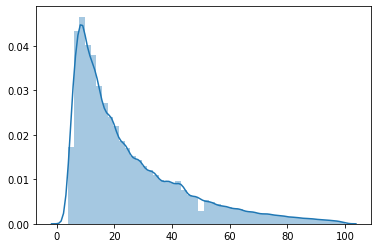

In [50]:
sns.distplot(df['ga_len'].values)
print(f'Median length is: {np.median(df["ga_len"])}')

Median length is: 18.0


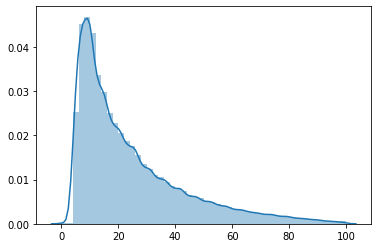

In [51]:
import seaborn as sns
sns.distplot(df['en_len'].values)
print(f'Median length is: {np.median(df["en_len"])}')

### Pre-processing

**Remove long texts to make things easier**

In [52]:
# Word count 90th percentile
np.percentile([o for o in df.en_len.values], 90), np.percentile([o for o in df.ga_len.values], 90)

(52.0, 53.0)

In [53]:
print(f'Removing {len(df.query("en_len > 60"))} EN samples where len was > 60')
print(len(df))
df=df[~df.index.isin(df.query("en_len > 60").index)]
print(len(df))
      
print(f'Removing {len(df.query("ga_len > 60"))} FR samples where len was > 60')
print(len(df))
df=df[~df.index.isin(df.query("ga_len > 60").index)]
print(len(df))

Removing 45779 EN samples where len was > 60
717739
671960
Removing 10378 FR samples where len was > 60
671960
661582


(<matplotlib.axes._subplots.AxesSubplot at 0x7f27e10614d0>, 16.0)

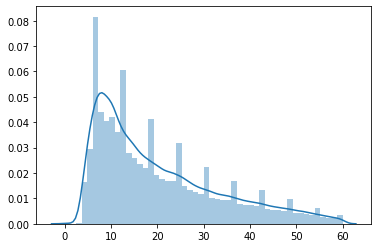

In [54]:
sns.distplot(df['en_len'].values), np.median(df['en_len'])

**Lowercase everything**

In [55]:
df['en'] = df['en'].apply(lambda x:x.lower())
df['ga'] = df['ga'].apply(lambda x:x.lower())

Rules used as part of tokenization

In [56]:
proc_rules=defaults.text_proc_rules[:-1] + [partial(lowercase, add_eos=True)]
proc_rules

[<function fastai2.text.core.fix_html(x)>,
 <function fastai2.text.core.replace_rep(t)>,
 <function fastai2.text.core.replace_wrep(t)>,
 <function fastai2.text.core.spec_add_spaces(t)>,
 <function fastai2.text.core.rm_useless_spaces(t)>,
 <function fastai2.text.core.replace_all_caps(t)>,
 <function fastai2.text.core.replace_maj(t)>,
 functools.partial(<function lowercase at 0x7f284366c680>, add_eos=True)]

### Get Dataloaders

Load vocab to speed up data loading

In [57]:
import csv
en_vocab=[]
ga_vocab=[]
with open('paracrawl_vocab_en.csv', newline='') as csvfile:
    v_reader = csv.reader(csvfile, delimiter=',')
    for row in v_reader:
        en_vocab.append(row[0])
        
with open('paracrawl_vocab_ga.csv', newline='') as csvfile:
    v_reader = csv.reader(csvfile, delimiter=',')
    for row in v_reader:
        ga_vocab.append(row[0])
        
#len(en_vocab), len(ga_vocab), en_vocab[:10], ga_vocab[:10]

In [58]:
splits = ColSplitter()(df) 

tfms = [[Tokenizer.from_df(text_cols='en' , rules=proc_rules), attrgetter("text"), Numericalize(max_vocab=20000)], 
       [Tokenizer.from_df(text_cols='ga', lang='ga', rules=proc_rules), attrgetter("text"), Numericalize(max_vocab=20000)]]

dl = partial(SortedDL, shuffle=True)

dsets = Datasets(df, tfms, splits=splits, dl_type=dl)

In [59]:
len(dsets), splits, len(dsets[2][0]), len(dsets[2][1]), dsets[2]

(661582,
 ((#529252) [0,1,2,6,7,10,11,12,13,14...],
  (#132330) [3,4,5,8,9,22,24,25,29,31...]),
 40,
 38,
 (TensorText([    2,     0,   151,  3839,   141,    70,   141,  2027,    13,   166,
          12697,    24,  1645,     0,    10,    20,     9,  6356,    11,    16,
            677,    17,     9,     0,    11,    18,  2607,  3677,    12,  2922,
            193,    13,     9,     0,    11,     9,  2607,  7649,    12,     3]),
  TensorText([    2,     0,   342,  9565,   955,    69,   116,    69,     0,     0,
           3023,     0,    20,  1525,     0,     9,    10,  4005,    14,    33,
           2972,    18,   193,  2569, 15045,    12,  2569,    10,  2062,   194,
             11,     0,    11,  5022,    19,  4321,    12,     3])))

In [60]:
bs,sl = 48, 108
dls = dsets.dataloaders(bs=bs, seq_len=sl, before_batch=partial(pad_input, pad_fields=[0,1]))
dls.show_batch()

,text,text_
0,"xxbos this deferred tax asset not recognised comprises a deferred tax asset in relation to the net pension deficit recognised of xxunk , xxrep 3 0 ( 2008 : xxunk ) , timing differences on business restructuring , xxunk , xxrep 3 0 ( 2008 : xxunk , xxrep 3 0 ) , tax losses forward not utilised , xxunk , xxrep 3 0 ( 2008 : xxunk , xxrep 3 0 ) , offset by other timing differences of xxunk , xxrep 3 0 ( 2008 : xxunk , xxrep 3 0 ) . xxeos","xxbos t an tscmhainn cnacha iarchurtha nach bhfuil aitheanta comhdhanta de shcmhainn cnach iarchurtha i ndil le glan - easnamh pinsin aitheanta de xxunk , xxrep 3 0 ( 2008 : xxunk ) , de xxunk xxunk ar athstruchtr gn , xxunk , xxrep 3 0 ( 2008 : xxunk , xxrep 3 0 ) , na caillteanais chnach ar aghaidh nr sideadh , xxunk , xxrep 3 0 ( 2008 : xxunk , xxrep 3 0 ) , t xxunk ag difrochta xxunk de xxunk , xxrep 3 0 ( 2008 : xxunk , xxrep 3 0 ) . xxeos"
1,"xxbos 5 . ( 1 ) the agency shall , at such times as , and in respect of every period to which , subsection ( 2 ) of this section relates , draw up and submit to the minister for his approval , given by him after consultation with the minister for finance , a programme outlining the agency 's projected activities ( in this section referred to as a strategic plan ) . xxeos xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad","xxbos 5 . ( 1 ) danfaidh an ghnomhaireacht , cib trth , agus i leith gach trimhse , lena mbaineann fo - alt ( 2 ) den alt seo , clr ina leagfar amach gnomhaochta ramh - mheasta na gnomhaireachta ( d ngairtear plean straitiseach san alt seo ) a tharraingt suas agus a chur faoi bhrid an aire le go gceadidh s tar is d dul i gcomhairle leis an aire airgeadais . xxeos xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad"
2,"xxbos [ ga ] ( a ) the doing , before the passing of this act , by the former disciplinary committee or the registrar , in purported exercise of the powers purported to have been conferred on them or him by section 18 or 21 of the principal act , of any act , being an act purported to have been authorised to be done by such section , [ ga ] xxeos xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad","xxbos ( a ) danamh aon ghnmh , roimh an acht seo a rith , ag an sean - choiste araonachta n ag an xxunk , i bhfeidhmi airbheartaithe na gcumhachta a xxunk a tugadh dibh n d le halt 18 n 21 den phromh - acht , is gnomh ar xxunk a bheith daraithe a dhanamh leis an alt sin , xxeos xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad"
3,"xxbos details of courses across a range of career clusters will be available from business , administration , ict , finance , social care , nursing , health care , animal care , tourism and tour guiding , sport , law , art and photography , tv , film and radio production , to xxunk , wind turbine maintenance , overhead lines , fibre installation , motor mechanics , welding and cad . xxeos xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad","xxbos beidh sonra ar fil faoi rimse gairmeacha , leithid gn , riarachn , romhaireacht , airgeadas , obair shisialta , xxunk , cram slinte , cram ainmhithe , turasireacht agus turasireacht treoraithe , sprt , dl , ealan agus grianghrafadireacht , tv , liri sca xxrep 3 n agus raidi , gearradh cloch , cothabhil tuirbn gaoithe , lnte xxunk , suiteil xxunk , xxunk , xxunk agus cad . xxeos xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad x

Save vocab to speed up data loading

In [61]:
# import csv

# with open('paracrawl_vocab_en.csv', 'w', newline='') as csvfile:
#     v_writer = csv.writer(csvfile, delimiter=',')
#     for l in dls.vocab[0]:
#         v_writer.writerow([l])
        
# with open('paracrawl_vocab_ga.csv', 'w', newline='') as csvfile:
#     v_writer = csv.writer(csvfile, delimiter=',')
#     for l in dls.vocab[1]:
#         v_writer.writerow([l])

In [62]:
len(dls.train_ds)+len(dls.valid_ds), len(dls.train), len(dls.valid)

(661582, 11026, 2757)

In [63]:
print(f'Vocab lengths are : {len(dls.vocab[0]), len(dls.vocab[1])}')

Vocab lengths are : (20008, 20008)


In [64]:
o=dls.one_batch(); o[0].size(), o[1].size(), o

(torch.Size([48, 96]),
 torch.Size([48, 101]),
 (TensorText([[   2,   25, 6265,  ...,   14,   12,    3],
          [   2,   90,   12,  ...,    1,    1,    1],
          [   2,   15,  113,  ...,    1,    1,    1],
          ...,
          [   2,   15,   41,  ...,    1,    1,    1],
          [   2,   15,   74,  ...,    1,    1,    1],
          [   2,   15,   74,  ...,    1,    1,    1]], device='cuda:0'),
  TensorText([[  2,  31,  11,  ...,  15,  12,   3],
          [  2, 108,  12,  ...,   1,   1,   1],
          [  2,  13, 130,  ...,   1,   1,   1],
          ...,
          [  2,  13,  43,  ...,   1,   1,   1],
          [  2,  13,  87,  ...,   1,   1,   1],
          [  2,  13,  87,  ...,   1,   1,   1]], device='cuda:0')))

## Transformer model

### Positional Embeddings

The input and output embeddings are traditional PyTorch embeddings (and we can use pretrained vectors if we want to). The transformer model isn't a recurrent one, so it has no idea of the relative positions of the words. To help it with that, they had to the input embeddings a positional encoding which is cosine of a certain frequency:

In [65]:
class PositionalEncoding(nn.Module):
    "Encode the position with a sinusoid."
    def __init__(self, d):
        super().__init__()
        self.register_buffer('freq', 1 / (10000 ** (torch.arange(0., d, 2.)/d)))
    
    def forward(self, pos):
        inp = torch.ger(pos, self.freq)
        enc = torch.cat([inp.sin(), inp.cos()], dim=-1)
        return enc

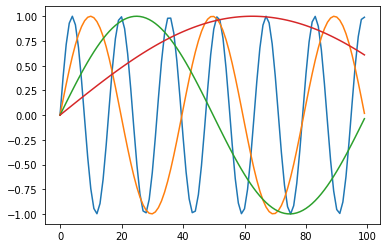

In [66]:
tst_encoding = PositionalEncoding(20)
res = tst_encoding(torch.arange(0,100).float())
_, ax = plt.subplots(1,1)
for i in range(1,5): ax.plot(res[:,i])

In [67]:
class TransformerEmbedding(nn.Module):
    "Embedding + positional encoding + dropout"
    def __init__(self, vocab_sz, emb_sz, inp_p=0.):
        super().__init__()
        self.emb_sz = emb_sz
        self.embed = Embedding(vocab_sz, emb_sz)
        self.pos_enc = PositionalEncoding(emb_sz)
        self.drop = nn.Dropout(inp_p)
    
    def forward(self, inp): 
        pos = torch.arange(0, inp.size(1), device=inp.device).float()        
        return self.drop(self.embed(inp) * math.sqrt(self.emb_sz) + self.pos_enc(pos))

## PyTorch Transformer Simple

Note: [src/tgt/memory]_mask should be filled with float(‘-inf’) for the masked positions and float(0.0) else. These masks ensure that predictions for position i depend only on the unmasked positions j and are applied identically for each sequence in a batch. 

[src/tgt/memory]_key_padding_mask should be a ByteTensor where True values are positions that should be masked with float(‘-inf’) and False values will be unchanged. This mask ensures that no information will be taken from position i if it is masked, and has a separate mask for each sequence in a batch.

attn mask with -inf
key_padding mask with True

### pt_Pos_Embeddings 

In [68]:
# class PositionalEncoding(nn.Module):
#     "Encode the position with a sinusoid."
#     def __init__(self, d):
#         super().__init__()
#         self.register_buffer('freq', 1 / (10000 ** (torch.arange(0., d, 2.)/d)))
    
#     def forward(self, pos):
#         inp = torch.ger(pos, self.freq)
#         enc = torch.cat([inp.sin(), inp.cos()], dim=-1)
#         return enc

In [69]:
# class TransformerEmbedding(nn.Module):
#     "Embedding + positional encoding + dropout"
#     def __init__(self, vocab_sz, emb_sz, inp_p=0.):
#         super().__init__()
#         self.emb_sz = emb_sz
#         self.embed = Embedding(vocab_sz, emb_sz)
#         self.pos_enc = PositionalEncoding(emb_sz)
#         self.drop = nn.Dropout(inp_p)
    
#     def forward(self, inp): 
#         pos = torch.arange(0, inp.size(1), device=inp.device).float()        
#         return self.drop(self.embed(inp) * math.sqrt(self.emb_sz) + self.pos_enc(pos))

Annotated Transformer:
- Does dropout on everything, after summing pos bit
- Scaling is done

```
class PositionalEncoding(nn.Module):
    "Implement the PE function."
    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + Variable(self.pe[:, :x.size(1)], 
                         requires_grad=False)
        return self.dropout(x)
```


In [70]:
class pt_PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(pt_PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

### pt_Transformer

In [71]:
class pt_Transformer(Module):
    def __init__(self, src_vcbsz, trg_vcbsz, n_enc_layers=6, n_dec_layers=6, n_heads=8, d_model=256, d_head=32, 
                 d_inner=1024, p=0.1, bias=True, scale=True, double_drop=True, pad_idx=1):
        self.pad_idx = pad_idx
        self.enc_tfmr_emb = TransformerEmbedding(src_vcbsz, d_model, p)
        self.dec_tfmr_emb = TransformerEmbedding(trg_vcbsz, d_model, 0.)        
        self.final = nn.Linear(d_model, trg_vcbsz)
        
        # !!!
        #self.final.weight = self.dec_tfmr_emb.embed.weight    # !! What does this do?
        
        self.transformer_model=torch.nn.Transformer(d_model=d_model, nhead=n_heads, num_encoder_layers=n_enc_layers, 
                                   num_decoder_layers=n_dec_layers, dim_feedforward=d_inner, dropout=p, 
                                   activation='relu', custom_encoder=None, custom_decoder=None)
    
    
    def forward(self, src, trg, src_mask=None, tgt_mask=None, memory_mask=None, 
                        src_key_padding_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None):
        
        enc_emb, dec_emb = self.enc_tfmr_emb(src), self.dec_tfmr_emb(trg)
        
        src_mask=self.transformer_model.generate_square_subsequent_mask(src.size(1)).cuda()
        trg_mask=self.transformer_model.generate_square_subsequent_mask(trg.size(1)).cuda()
        
        dec_out = self.transformer_model(enc_emb.permute(1,0,2), dec_emb.permute(1,0,2),
                                         src_mask=src_mask, tgt_mask=trg_mask, memory_mask=None, 
                        src_key_padding_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None)
        
        out=self.final(dec_out)
        
        return out.permute(1,0,2)

### Metric

In [72]:
class CorpusBLEUMetric(Metric):
    def __init__(self, vocab_sz=5000, axis=-1):
        """BLEU Metric calculated over the validation corpus"""
        self.pred_len, self.targ_len, self.corrects, self.counts = 0,0,[0]*4,[0]*4
        self.axis, self.vocab_sz = axis, vocab_sz
        
    def reset(self):
        self.pred_len,self.targ_len,self.corrects,self.counts = 0,0,[0]*4,[0]*4
        
    class NGram():
        def __init__(self, ngram, max_n=5000): self.ngram,self.max_n = ngram,max_n
        def __eq__(self, other):
            if len(self.ngram) != len(other.ngram): return False
            return np.all(np.array(self.ngram) == np.array(other.ngram))
        def __hash__(self): return int(sum([o * self.max_n**i for i,o in enumerate(self.ngram)]))
    
    def get_grams(self, x, n, max_n=5000):
        return x if n==1 else [self.NGram(x[i:i+n], max_n=max_n) for i in range(len(x)-n+1)]
    
    def get_correct_ngrams(self, pred, targ, n, max_n=5000):
        pred_grams,targ_grams = self.get_grams(pred, n, max_n=max_n),self.get_grams(targ, n, max_n=max_n)
        pred_cnt,targ_cnt = Counter(pred_grams),Counter(targ_grams)
        return sum([min(c, targ_cnt[g]) for g,c in pred_cnt.items()]),len(pred_grams)
        
    def accumulate(self, learn):
        last_output = learn.pred.argmax(dim=self.axis)
        last_target = learn.y
        for pred,targ in zip(last_output.cpu().numpy(),last_target.cpu().numpy()):
            self.pred_len += len(pred)
            self.targ_len += len(targ)
            for i in range(4):
                c,t = self.get_correct_ngrams(pred, targ, i+1, max_n=self.vocab_sz)
                self.corrects[i] += c
                self.counts[i]   += t
        
    @property
    def value(self): 
        if self.counts == 0: return None
        else:
            precs = [c/t for c,t in zip(self.corrects,self.counts)]
            len_penalty = exp(1 - self.targ_len/self.pred_len) if self.pred_len < self.targ_len else 1
            return len_penalty * ((precs[0]*precs[1]*precs[2]*precs[3]) ** 0.25)

### Callbacks

#### Present Input and Target in a single tuple

In [73]:
class CombineInputOutputCallback(Callback):
    '''Callback to combine the input and target text into self.xb'''
    def __init__(self): pass
    def begin_batch(self): 
        self.learn.xb = (self.xb[0], self.yb[0])

Shifting and masking of y, from [Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html#training):

> We also modify the self-attention sub-layer in the decoder stack to prevent positions from attending to subsequent positions. This masking, combined with fact that the output embeddings are offset by one position, ensures that the predictions for position i can depend only on the known outputs at positions less than i.

#### Shifting

#### Target shift/offset explained

**Taken from [@bentrevett's brilliant github repo "pytorch-seq2seq" tutorials](https://github.com/bentrevett/pytorch-seq2seq/blob/master/6%20-%20Attention%20is%20All%20You%20Need.ipynb):**

As we want our model to predict the <eos> token but not have it be an input into our model we simply slice the <eos> token off the end of the sequence. Thus:

$$\begin{align*}\text{trg} &= [sos, x_1, x_2, x_3, eos]\\\text{trg[:-1]} &= [sos, x_1, x_2, x_3]\end{align*}$$

$x_i$ denotes **actual** target sequence element. We then feed this into the model to get a predicted sequence that should hopefully predict the <eos> token:

$$\begin{align*}
\text{output} &= [y_1, y_2, y_3, eos]
\end{align*}$$

$y_i$ denotes **predicted** target sequence element. We then calculate our loss using the original trg tensor with the <sos> token sliced off the front, leaving the <eos> token:

$$\begin{align*} \text{output} &= [y_1, y_2, y_3, eos]\\ \text{trg[1:]} &= [x_1, x_2, x_3, eos] \end{align*}$$

We then calculate our losses and update our parameters as is standard.
    
    
We don't want to punish the model for not translating the 'sos' token, but we do need it to predict/define the end of the sentence

**RemoveEOSCallback** 

Cut the *EOS* token token from the **output_x** presented to the model as we are trying to predict the next word. Therefore don't want to model to try anything after the *EOS* token. So the last token given to the model will be the token before *EOS*. This callback is modifies the second element of our learn.xb, (which is the *copied* yb)

But this should also ignore padding, as otherwise we'll be just cutting the last padding token and not the EOS

In [74]:
class RemoveEOSCallback(Callback):
    '''
        Shift the target presented to the model during training to remove the "eos" token as 
        we don't want the model to learn to translate EOS. When it sees EOS.
        
        In practice we actually mask the EOS token as due to batching the last token will often be a <pad> token,
        not EOS
    '''
    def __init__(self, eos_idx): self.eos_idx=eos_idx
    def begin_batch(self):        
        eos_mask=(self.learn.xb[1]!=self.eos_idx)
        sz=torch.tensor(self.learn.xb[1].size())
        sz[1]=sz[1]-1
        self.learn.xb = (self.learn.xb[0], self.learn.xb[1][eos_mask].view((sz[0],sz[1])))

**LossTargetShiftCallback:** Shift the target shown to the loss to exclude the "eos" token, as translating "bos" is not part of our language translation objective

In [75]:
class LossTargetShiftCallback(Callback):
    '''
        Shift the target shown to the loss to exclude the "bos" token as the first token we want predicted
        should be an actual word, not the "bos" token (as we have already given the model "bos" )
    '''
    def __init__(self): pass
    def after_pred(self): 
        self.learn.yb = (self.learn.yb[0][:,1:],)

### Model

Transformer size from Annotated Transformer:

N=6, d_model=512, d_ff=2048, h=8

In [76]:
pad_idx=1
assert dls.vocab[1][pad_idx] == 'xxpad' 
n_x_vocab, n_y_vocab = len(dls.vocab[0]), len(dls.vocab[1])
d_model=512
n_heads=8 #12
d_inner=2048  #1024

#model = Transformer(n_x_vocab, n_y_vocab, d_model=d_model, n_heads=n_heads, pad_idx=pad_idx)

model=pt_Transformer(src_vcbsz=n_x_vocab, trg_vcbsz=n_y_vocab, d_model=d_model, d_inner=d_inner)

In [77]:
model

pt_Transformer(
  (enc_tfmr_emb): TransformerEmbedding(
    (embed): Embedding(20008, 512)
    (pos_enc): PositionalEncoding()
    (drop): Dropout(p=0.1, inplace=False)
  )
  (dec_tfmr_emb): TransformerEmbedding(
    (embed): Embedding(20008, 512)
    (pos_enc): PositionalEncoding()
    (drop): Dropout(p=0.0, inplace=False)
  )
  (final): Linear(in_features=512, out_features=20008, bias=True)
  (transformer_model): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_a

Kaiming_Normal works terrribly, at least if you apply it to everything except LayerNorm...

DistilBERT works ok

Could try xavier:

```
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

model.apply(initialize_weights);
```

DistilBERT initialisation:

In [78]:
# DistilERT HF init weights https://github.com/huggingface/transformers/blob/31e67dd19f1b3fe2bc9a13f86d814f3f7bba48e4/src/transformers/modeling_distilbert.py

def distil_apply_leaf(m, f):
    "Apply `f` to children of `m`."
    c = m.children()
    if isinstance(m, nn.Module): f(m)
    for l in c: apply_leaf(l,f)


def _distilbert_init_weights(module):
    """ Initialize the weights.
    """
    if isinstance(module, nn.Embedding):
        if module.weight.requires_grad:
            module.weight.data.normal_(mean=0.0, std=0.02) #std=self.config.initializer_range)
    if isinstance(module, nn.Linear):
        module.weight.data.normal_(mean=0.0, std=0.02) #self.config.initializer_range)
    elif isinstance(module, nn.LayerNorm):
        module.bias.data.zero_()
        module.weight.data.fill_(1.0)
    if isinstance(module, nn.Linear) and module.bias is not None:
        module.bias.data.zero_()

distil_apply_leaf(model, _distilbert_init_weights)

In [79]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 74,892,840 trainable parameters


### Learner

In [80]:
cbs = [CombineInputOutputCallback, RemoveEOSCallback(eos_idx=3), LossTargetShiftCallback]

pad_idx=1
assert dls.vocab[1][pad_idx] == 'xxpad' 
loss_func = CrossEntropyLossFlat(ignore_index=pad_idx)

learn = Learner(dls, model, metrics=[accuracy, Perplexity(), CorpusBLEUMetric(vocab_sz=n_y_vocab)], 
                cbs=cbs, loss_func=loss_func)

In [81]:
#learn.load('paracrawl_en_ga_5e_5e-4')

# Training

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.0012022644514217973)

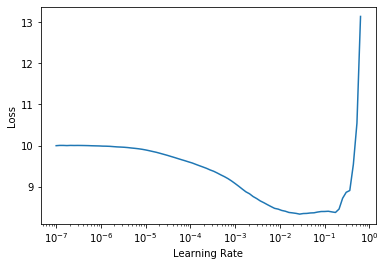

In [49]:
learn.lr_find()

## 5e Run

In [47]:
# 5e, PT Transformer, distilbert init, Adam, distilbert init
# CONCLUSION: 
learn.fit_one_cycle(5, 5e-4, div=5)

epoch,train_loss,valid_loss,accuracy,perplexity,corpus_bleu,time
0,1.653487,1.684406,0.479604,5.389246,0.310178,24:02
1,1.302716,1.293889,0.524035,3.646941,0.370828,24:00
2,0.956889,1.114578,0.547175,3.048281,0.405713,24:04
3,0.745926,0.990513,0.564060,2.692616,0.432489,24:22
4,0.719075,0.947289,0.569523,2.578710,0.441353,24:01


In [48]:
learn.save('paracrawl_en_ga_5e_5e-4')

In [56]:
learn.export(fname='paracrawl_en_ga_5e_5e-4_learner.pkl')

## Generation

In [49]:
def generate(model, sentence, vocab):
    #model = torch.load('output/transformer.pth')
#     lang_model = spacy.load('en')
#     with open('data/processed/en/freq_list.pkl', 'rb') as f:
#         en_freq_list = pickle.load(f)
#     with open('data/processed/fr/freq_list.pkl', 'rb') as f:
#         fr_freq_list = pickle.load(f)
    #sentence = input('Please enter your english sentence: ')
    #sentence = tokenize(sentence, en_freq_list, lang_model)
    
    model=model.eval()
    
    sentence=learn.dls.tokenizer[0][1].encodes(sentence)
    sentence=learn.dls.numericalize[0].encodes(sentence)
    
    translated_sentence = [2] # xxbos
    #translated_sentence = [fr_freq_list['[SOS]']]
    i = 0
    while int(translated_sentence[-1]) != 3 and i < 75:   # xxeos
    #while int(translated_sentence[-1]) != fr_freq_list['[EOS]'] and i < 15:
        #output = forward_model(model, sentence, translated_sentence).to('cuda')
        output = forward_model(model, sentence, translated_sentence).cuda()
        values, indices = torch.topk(output, 5)
        translated_sentence.append(int(indices[-1][0]))
        i+=1

    detok_translated_sentence=detokenize(translated_sentence, vocab)
    print(' '.join(detok_translated_sentence))
    

def forward_model(model, src, tgt):
    src = torch.as_tensor(src).unsqueeze(0).long().cuda()
    tgt = torch.as_tensor(tgt).unsqueeze(0).cuda()
    tgt_mask = gen_nopeek_mask(tgt.shape[1]).cuda()
    output = model.forward(src, tgt, tgt_mask=tgt_mask, src_key_padding_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None)

    #return output.squeeze(0).to('cpu')
    return output.squeeze(0).detach()


# def tokenize(sentence, freq_list, lang_model):
#     punctuation = ['(', ')', ':', '"', ' ']

#     sentence = sentence.lower()
#     sentence = [tok.text for tok in lang_model.tokenizer(sentence) if tok.text not in punctuation]
#     return [freq_list[word] if word in freq_list else freq_list['[OOV]'] for word in sentence]


def detokenize(sentence, vocab):
    #freq_list = {v: k for k, v in freq_list.items()}
    return [vocab[token] for token in sentence]
    #return [freq_list[token] for token in sentence]
# def detokenize(sentence, freq_list):
#     freq_list = {v: k for k, v in freq_list.items()}
#     return [freq_list[token] for token in sentence]


def gen_nopeek_mask(length):
    mask = rearrange(torch.triu(torch.ones(length, length)) == 1, 'h w -> w h')
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask

## 5e results

In [50]:
generate(learn.model, "hello, how are you?", dls.vocab[1])

xxbos dia duit , conas a bhfuil t ? xxeos


In [51]:
generate(learn.model, "Can you tell we where the bus station is please?", dls.vocab[1])

xxbos is fidir xxunk insint duit nuair a bhonn an stisin bus le do thoil ? xxeos


In [52]:
generate(learn.model, "Yesterday it rained, but tomorrow will be very sunny", dls.vocab[1])

xxbos xxunk inn xxunk s , ach beidh amrach a bheith an - xxunk xxeos


In [53]:
generate(learn.model, "I had a great day, my translator is working", dls.vocab[1])

xxbos bh m l iontach , t mo aistritheoir ag obair xxeos


In [54]:
generate(learn.model, "So this is a story all about how my lift got flip turned \
upside down, so I'd like to take a minute just sit right there, I'll you all about how I became the fresh prince\
of belair", dls.vocab[1])

xxbos xxunk mar sin is seo an scal ar fad faoi conas a fuair mo ardaitheoir smeach xxunk sos , mar sin xxunk ba mhaith liom a ghlacadh nimad ach su ceart ann , xxunk m go mbainfidh t go lir faoi conas a thinig m an xxunk r xxunk xxeos


In [58]:
generate(learn.model, "dog", dls.vocab[1])

xxbos madra xxeos


In [59]:
generate(learn.model, "cat", dls.vocab[1])

xxbos cat cat xxeos


In [60]:
generate(learn.model, "tree", dls.vocab[1])

xxbos crann xxeos


In [61]:
generate(learn.model, "building", dls.vocab[1])

xxbos foirgneamh xxeos


In [62]:
generate(learn.model, "city", dls.vocab[1])

xxbos cathair na mart xxeos


In [63]:
generate(learn.model, "woman", dls.vocab[1])

xxbos bean xxeos


In [65]:
generate(learn.model, "man", dls.vocab[1])

xxbos fear xxeos


In [64]:
generate(learn.model, "chocolate", dls.vocab[1])

xxbos seaclid seaclid seaclid xxeos


In [66]:
generate(learn.model, "spaceship", dls.vocab[1])

xxbos spsrthach spsrthach xxeos


## 20e Run

In [50]:
# 20e, added shuffle to sorteddl, PT Transformer, distilbert init, Adam, distilbert init
# CONCLUSION: 
learn.fit_one_cycle(20, 5e-4, div=5)

epoch,train_loss,valid_loss,accuracy,perplexity,corpus_bleu,time
0,1.636746,1.624053,0.490452,5.073614,0.324452,22:39
1,1.260920,1.325647,0.520619,3.764619,0.366522,22:41
2,1.232290,1.289559,0.525144,3.631185,0.372480,23:00
3,1.171967,1.256577,0.530127,3.513375,0.378737,23:07
4,1.081539,1.233820,0.534953,3.434322,0.385957,22:55
5,1.021572,1.175043,0.540957,3.238282,0.395813,22:44
6,0.962378,1.145241,0.546696,3.143200,0.404170,23:03
7,0.893671,1.105928,0.551453,3.022028,0.412557,22:47
8,0.868382,1.097856,0.555033,2.997732,0.419388,22:56
9,0.788918,1.052471,0.559421,2.864722,0.425994,22:58


In [51]:
learn.save('paracrawl_en_ga_20e_5e-4')

In [52]:
learn.export(fname='paracrawl_en_ga_20e_5e-4_learner.pkl')

## Generation

In [53]:
def generate(model, sentence, vocab):
    #model = torch.load('output/transformer.pth')
#     lang_model = spacy.load('en')
#     with open('data/processed/en/freq_list.pkl', 'rb') as f:
#         en_freq_list = pickle.load(f)
#     with open('data/processed/fr/freq_list.pkl', 'rb') as f:
#         fr_freq_list = pickle.load(f)
    #sentence = input('Please enter your english sentence: ')
    #sentence = tokenize(sentence, en_freq_list, lang_model)
    
    model=model.eval()
    
    sentence=learn.dls.tokenizer[0][1].encodes(sentence)
    sentence=learn.dls.numericalize[0].encodes(sentence)
    
    translated_sentence = [2] # xxbos
    #translated_sentence = [fr_freq_list['[SOS]']]
    i = 0
    while int(translated_sentence[-1]) != 3 and i < 75:   # xxeos
    #while int(translated_sentence[-1]) != fr_freq_list['[EOS]'] and i < 15:
        #output = forward_model(model, sentence, translated_sentence).to('cuda')
        output = forward_model(model, sentence, translated_sentence).cuda()
        values, indices = torch.topk(output, 5)
        translated_sentence.append(int(indices[-1][0]))
        i+=1

    detok_translated_sentence=detokenize(translated_sentence, vocab)
    print(' '.join(detok_translated_sentence))
    

def forward_model(model, src, tgt):
    src = torch.as_tensor(src).unsqueeze(0).long().cuda()
    tgt = torch.as_tensor(tgt).unsqueeze(0).cuda()
    tgt_mask = gen_nopeek_mask(tgt.shape[1]).cuda()
    output = model.forward(src, tgt, tgt_mask=tgt_mask, src_key_padding_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None)

    #return output.squeeze(0).to('cpu')
    return output.squeeze(0).detach()


# def tokenize(sentence, freq_list, lang_model):
#     punctuation = ['(', ')', ':', '"', ' ']

#     sentence = sentence.lower()
#     sentence = [tok.text for tok in lang_model.tokenizer(sentence) if tok.text not in punctuation]
#     return [freq_list[word] if word in freq_list else freq_list['[OOV]'] for word in sentence]


def detokenize(sentence, vocab):
    #freq_list = {v: k for k, v in freq_list.items()}
    return [vocab[token] for token in sentence]
    #return [freq_list[token] for token in sentence]
# def detokenize(sentence, freq_list):
#     freq_list = {v: k for k, v in freq_list.items()}
#     return [freq_list[token] for token in sentence]


def gen_nopeek_mask(length):
    mask = rearrange(torch.triu(torch.ones(length, length)) == 1, 'h w -> w h')
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask

## 20e results

In [54]:
generate(learn.model, "hello, how are you?", dls.vocab[1])

xxbos dia duit , conas a bhfuil t ? xxeos


In [55]:
generate(learn.model, "Can you tell we where the bus station is please?", dls.vocab[1])

xxbos xxunk an fidir leat insint dinn c bhfuil an stisin bus le do thoil ? xxeos


In [56]:
generate(learn.model, "Yesterday it rained, but tomorrow will be very sunny", dls.vocab[1])

xxbos xxunk inn xxunk s , ach beidh amrach a bheith an - xxunk xxeos


In [57]:
generate(learn.model, "I had a great day, my translator is working", dls.vocab[1])

xxbos bh m l mr , t mo aistritheoir ag obair xxeos


In [58]:
generate(learn.model, "So this is a story all about how my lift got flip turned \
upside down, so I'd like to take a minute just sit right there, I'll you all about how I became the fresh prince\
of belair", dls.vocab[1])

xxbos xxunk mar sin t an scal faoi conas a fuair mo ardaitheoir smeach xxunk sos , mar sin xxunk ba mhaith liom a ghlacadh nimad ach su ceart ann , xxunk beidh m go lir faoi conas a thinig m an xxunk r xxunk xxeos


In [59]:
generate(learn.model, "dog", dls.vocab[1])

xxbos madra xxeos


In [60]:
generate(learn.model, "cat", dls.vocab[1])

xxbos cat xxeos


In [61]:
generate(learn.model, "tree", dls.vocab[1])

xxbos crann xxeos


In [62]:
generate(learn.model, "building", dls.vocab[1])

xxbos foirgneamh xxeos


In [63]:
generate(learn.model, "city", dls.vocab[1])

xxbos cathair xxeos


In [64]:
generate(learn.model, "woman", dls.vocab[1])

xxbos bean xxeos


In [65]:
generate(learn.model, "man", dls.vocab[1])

xxbos fear xxeos


In [66]:
generate(learn.model, "chocolate", dls.vocab[1])

xxbos seaclid xxeos


In [67]:
generate(learn.model, "spaceship", dls.vocab[1])

xxbos spsrthach xxeos


## Alternative generation

In [ ]:
# https://forums.fast.ai/t/fastai-v2-text/53529/334
from fastai2.text.all import *

defaults.device = torch.device('cpu')
path = Path('.')
learner = load_learner("./export.pkl")

f = open("/tmp/test.txt", "r")
test_file_contents = f.read()

_, _, losses = learner.predict(test_file_contents)
cats = [learner.dls.categorize.decode(i) for i in range(len(losses))]

predictions = sorted(
    zip(cats, map(float, losses)),
    key=lambda p: p[1],
    reverse=True
)
print(predictions)

# OR

items = pd.read_csv("/tmp/test.txt", sep = '\t')
test_dl = learner.dls.test_dl(items.values)

learner.get_preds(dl=test_dl, with_decoded=False)